# **KNN Model from Scratch**

*   This is an interactive python notebook for KNN



In [16]:
from typing import ChainMap
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [17]:
def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

class KNN:
  def __init__(self, k=3):
    self.k = k

  def train(self, X,y):
    self.X_train = X
    self.y_train = y


  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    # compute distances and get closest K
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    # returns the indices
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    # majority vote
    most_common_label = Counter(k_nearest_labels).most_common(1)
    return most_common_label[0][0]


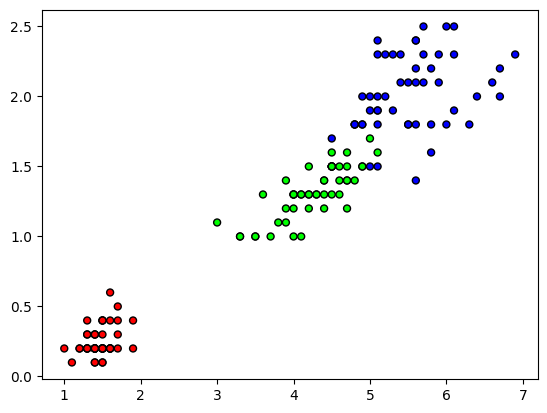

In [18]:
iris= datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolor='k', s=25)
plt.show()

In [19]:
clf = KNN(k=5)
clf.train(X_train, y_train)
predictions = clf.predict(X_test)
predictions

[np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(0)]

In [20]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)


0.9666666666666667
